## Adult Income Analysis in The United States of America

### 1.  Introduction 

In the following project we will be analysing Income of adults in the USA. This analysis will be based on various social factors such as Age, Race, Gender and Education. The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K".



### 2. Goal of The Project

This project aims to train a classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset. The target audience for our analysis our US Government Departments that study different socio-economic issues and come up with policies. It will be helpful departments dealing with taxes in the USA. Finally the project also helps the Adult population in the country. 





### 3. Data Setup

This Dataset was obtained from the UCI repository. This Data set is split into two CSV files, named adult-training.txt and adult-test.txt. First we will add all the relevent Libraries that we need to use to conduct our analysis. The will load the training and test data set into a dataframe and do all our operations on the dataframe. 

In [14]:
from sklearn_pandas import DataFrameMapper
from plotnine import *


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

training_data = 'adult-training.csv'
test_data = 'adult-test.csv'

columns = ['Age','Workclass','fnlgwt','Education','EdNum','MaritalStatus',
           'Occupation','Relationship','Race','Sex','CapitalGain','CapitalLoss',
           'HoursPerWeek','Country','Income']

df_train_set = pd.read_csv(training_data, names=columns)
df_test_set = pd.read_csv(test_data, names=columns, skiprows=1)
df_train_set.drop('fnlgwt', axis=1, inplace=True)
df_test_set.drop('fnlgwt', axis=1, inplace=True)

In [58]:
df_train_set.head()

,AgeGroup,Education,Workclass,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,Income
0,30-39,10-14,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50-59,10-14,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,30-39,5-9,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,50-59,5-9,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,20-29,10-14,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K


In [59]:
df_train_set.describe()

,CapitalGain,CapitalLoss,HoursPerWeek
count,32561.000000,32561.000000,32561.000000
mean,1077.648844,87.303830,40.437456
std,7385.292085,402.960219,12.347429
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,40.000000
50%,0.000000,0.000000,40.000000
75%,0.000000,0.000000,45.000000
max,99999.000000,4356.000000,99.000000


In [60]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
AgeGroup         32561 non-null category
Education        32561 non-null category
Workclass        32561 non-null object
MaritalStatus    32561 non-null object
Occupation       32561 non-null object
Relationship     32561 non-null object
Race             32561 non-null object
Sex              32561 non-null object
CapitalGain      32561 non-null int64
CapitalLoss      32561 non-null int64
HoursPerWeek     32561 non-null int64
Income           32561 non-null object
dtypes: category(2), int64(3), object(7)
memory usage: 2.5+ MB


### 4. Data Cleaning

Data cleaning is a process used to determine inaccurate, incomplete or unreasonable data and then improve the quality through correcting of detected errors and omissions. For any kind of analysis to be of higher accuracy we need to data cleaning on it first. The dataset is made up of categorical and continuous features. The categorical columns are: workclass, education, marital_status, occupation, relationship, race, gender, native_country. It also contains missing values. Our first step towards cleaning the data would be to get rid of the null or missing values. We will replace all the null characters with the word "unknown".

In [17]:
#replace the special character to "Unknown"
for i in df_train_set.columns:
    df_train_set[i].replace(' ?', 'Unknown', inplace=True)
    df_test_set[i].replace(' ?', 'Unknown', inplace=True)

The next step will be to bring all the catagoriacal values it into singular readable format as shown below:

In [19]:
# remove whitespaces and separtors from the catagorical columns in the set 
for col in df_train_set.columns:
    if df_train_set[col].dtype != 'int64':
        df_train_set[col] = df_train_set[col].apply(lambda val: val.replace(" ", ""))
        df_train_set[col] = df_train_set[col].apply(lambda val: val.replace(".", ""))
        df_test_set[col] = df_test_set[col].apply(lambda val: val.replace(" ", ""))
        df_test_set[col] = df_test_set[col].apply(lambda val: val.replace(".", ""))

The next step for cleaning of data is to drop any uneccessary columns that we wont require for analysis. Since we are anallysing for ony the country of united states we will drop the column "Country". Also the education column cotains catagorical values. Hence we will drop it since we can do analysis of education based on range.  

In [20]:
#Dropping Columns Country and Educations.
df_train_set.drop(["Country", "Education"], axis=1, inplace=True)
df_test_set.drop(["Country", "Education"], axis=1, inplace=True)

For this project we want to anlayse our data into certain groups. Analysis becomes particulary easy if we analyse each certain numerical values in ranges. Consider the attribute age, If we anlyse the ages 25 and 26, the analysis woul most probably yeild similar result in the case of income. Thus we will bring the ages into different groups. 

In the dataset the attribute of Education is catagorical value. The data will contains data such "Bachelors", "High School", "Masters" and so on. Such an attribute is a nominal type of attribute and could have different unique values for different courses. For example, there can be "Bachelors" courses with different durations. Thus we will create a column that takes in numerical values that represt a range of the number of years that the the particular person has undertaken.   

In [21]:
#Removing the columns age and Ednum
colnames = list(df_train_set.columns)
colnames.remove('Age')
colnames.remove('EdNum')
colnames = ['AgeGroup', 'Education'] + colnames

#Creating a column to represent the age group of a person
labels = ["{0}-{1}".format(i, i + 9) for i in range(0, 100, 10)]
df_train_set['AgeGroup'] = pd.cut(df_train_set.Age, range(0, 101, 10), right=False, labels=labels)
df_test_set['AgeGroup'] = pd.cut(df_test_set.Age, range(0, 101, 10), right=False, labels=labels)

#Creating a column to represent the range of the no. of years of education taken by a person
labels = ["{0}-{1}".format(i, i + 4) for i in range(0, 20, 5)]
df_train_set['Education'] = pd.cut(df_train_set.EdNum, range(0, 21, 5), right=False, labels=labels)
df_test_set['Education'] = pd.cut(df_test_set.EdNum, range(0, 21, 5), right=False, labels=labels)

df_train_set = df_train_set[colnames]
df_test_set = df_test_set[colnames]

### 5. Exploratory Data Analysis

Before we start testing our classifiers we will look at the data, how it is spread out and represented on different charts, diagrams plots and so on.

First we will analyze each of attributes by looking at how much data for each variable is present in the dataset. We can do that by showing the no of items present in each variable

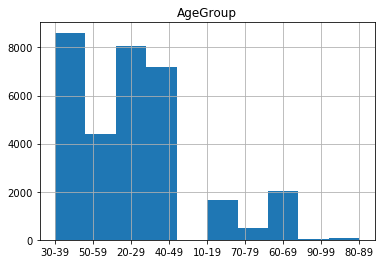

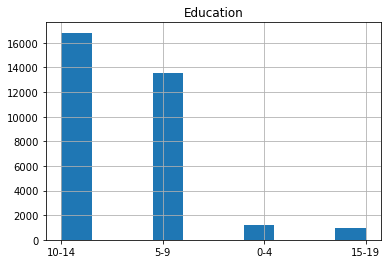

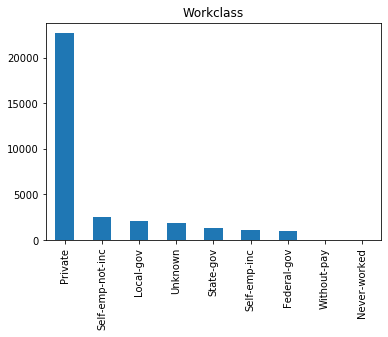

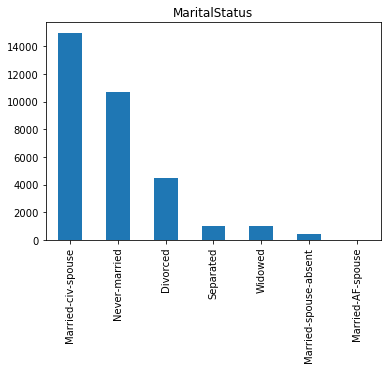

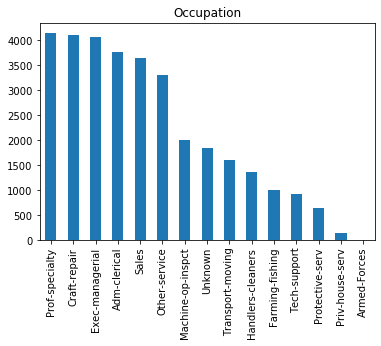

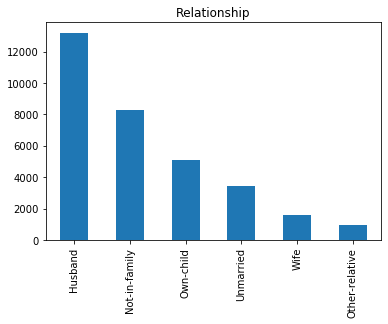

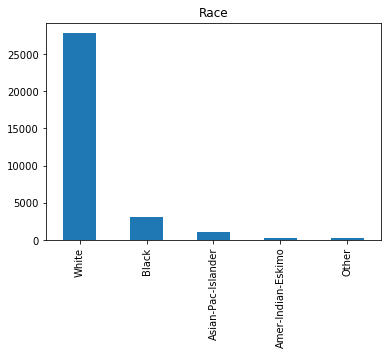

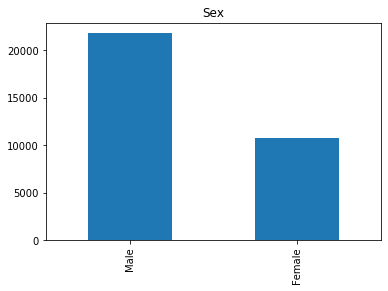

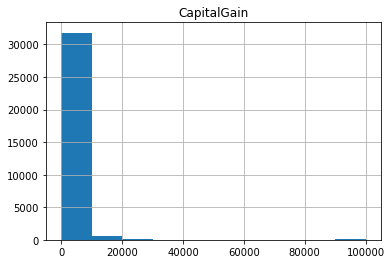

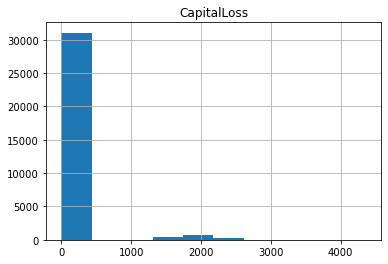

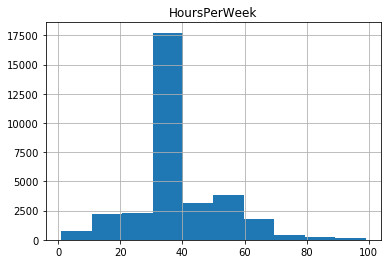

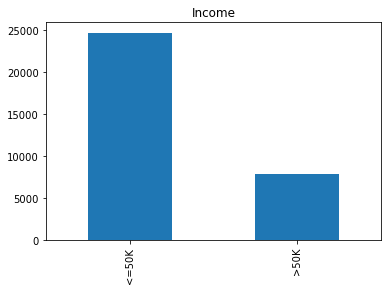

In [40]:
#Code for getting bar diagrams that count number of items in each variable
for column in df_train_set.columns:
    if df_train_set.dtypes[column] == np.object:
        df_train_set[column].value_counts().plot(kind="bar", title=column)
    else:
        df_train_set[column].hist()
        plt.title(column)
    plt.show()

Majority of our analysis is on the Attribute of income. Hence in the next step of analysing our dataset we will classify the income group either below 50K or above 50K. 

In [23]:
#Counting the number of rows with income <=50k and >50K in the trining data set
df_train_set.Income.value_counts()

<=50K    24720
>50K      7841
Name: Income, dtype: int64

In [24]:
#Counting the number of rows with income <=50k and >50K in the trining data set
df_test_set.Income.value_counts()

<=50K    12435
>50K      3846
Name: Income, dtype: int64

Once we the count we will look at the attribute income based on differnt factors present in the dataset like No of years of education, Race, Age and Gender. 

1. First will look at different the income of different Age Groups based on their Years of Educations

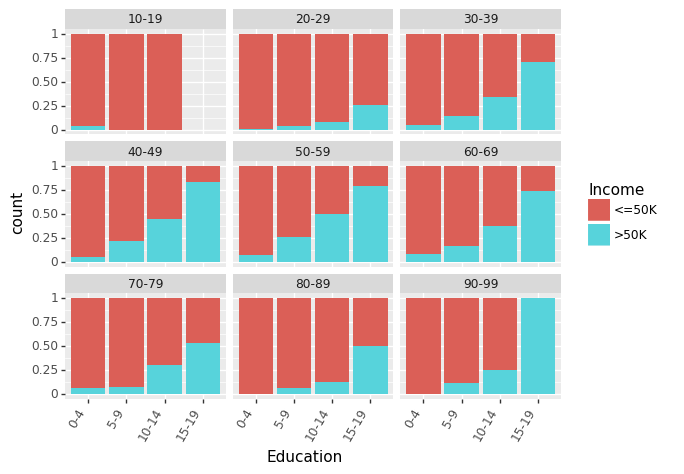

<ggplot: (18819185)>

In [26]:
(ggplot(df_train_set, aes(x = "Education", fill = "Income"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = 60, hjust = 1))
 + facet_wrap('~AgeGroup')
)

2. The plot given below divides the population based on Gender and their corresponding years of education. 

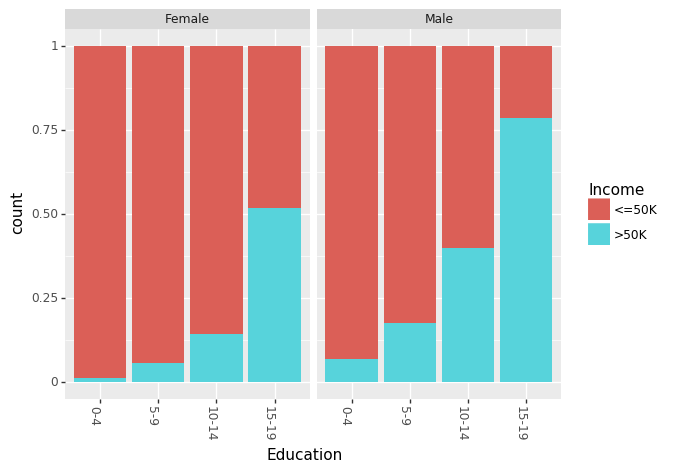

<ggplot: (132322317951)>

In [12]:
(ggplot(df_train_set, aes(x = "Education", fill = "Income"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
 + facet_wrap('~Sex')
)

3. Now well analyze the income group based on Gender and Race

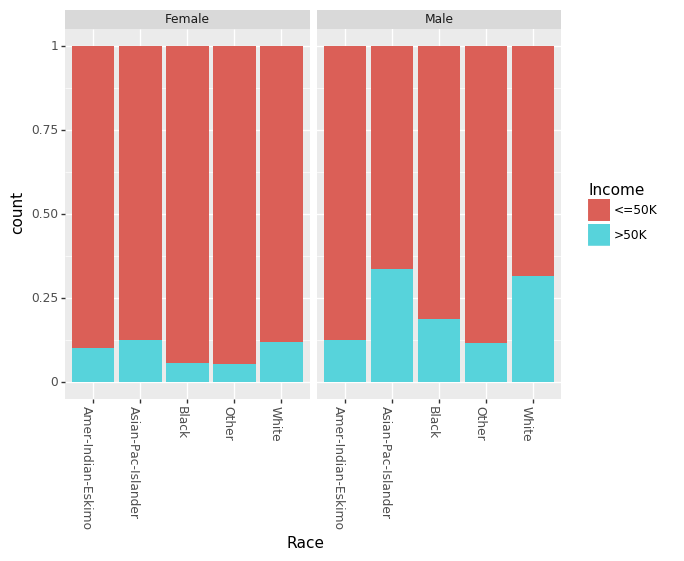

<ggplot: (19289783)>

In [30]:
(ggplot(df_train_set, aes(x = "Race", fill = "Income"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = -90, hjust = 1))
 + facet_wrap('~Sex')
)

4. We will also be looking at the income of different races and age groups in this chart

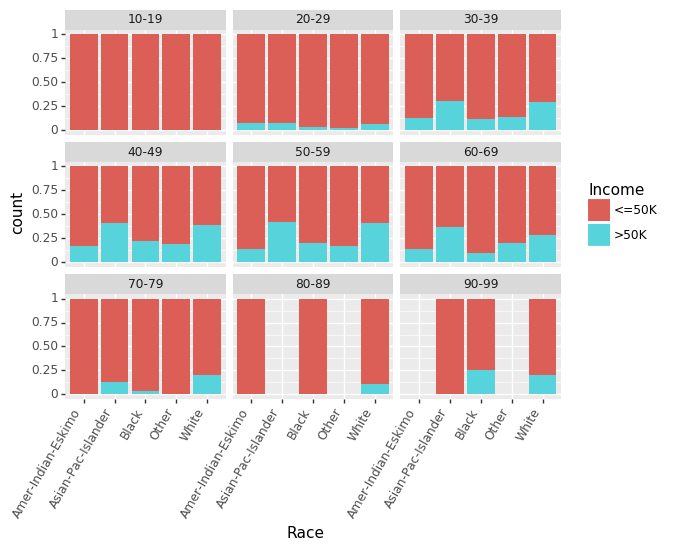

<ggplot: (19294549)>

In [31]:
(ggplot(df_train_set, aes(x = "Race", fill = "Income"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = 60, hjust = 1))
 + facet_wrap('~AgeGroup')
)

5. We can also explore the spread of our income group based on the marital status of the person. 

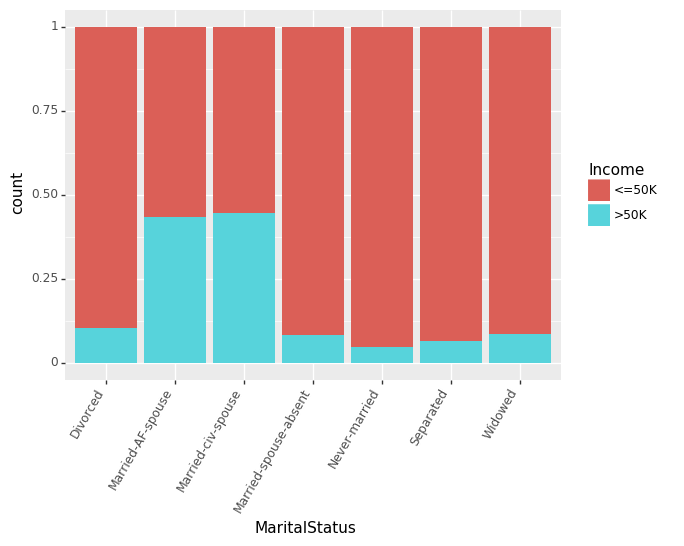

<ggplot: (19937768)>

In [38]:
(ggplot(df_train_set, aes(x = "MaritalStatus", fill = "Income"))
 + geom_bar(position="fill")
 + theme(axis_text_x = element_text(angle = 60, hjust = 1))
)

### 7. Algorithms

In the above we have seen the data and explored all the attributes to understand how they set in the data set. From the above observed information we can run a few algorithms to predict the income bracket of adults in the United States of America.

Here we will train the set using a few algorithms and evalute their accuracy using the test set. The algotithms are as follows:
1. Decision Tree Algorithm
2. K-Nearest Neighbour Algorithm
3. Random Forest Algorithm
4. ADA Boost Algorithm
5. Gradient Boost Algorithm 

In [42]:
#optimizing our training data set
mapper = DataFrameMapper([
    ('AgeGroup', LabelEncoder()),
    ('Education', LabelEncoder()),
    ('Workclass', LabelEncoder()),
    ('MaritalStatus', LabelEncoder()),
    ('Occupation', LabelEncoder()),
    ('Relationship', LabelEncoder()),
    ('Race', LabelEncoder()),
    ('Sex', LabelEncoder()),
    ('Income', LabelEncoder())
], df_out=True, default=None)

cols = list(df_train_set.columns)
cols.remove("Income")
cols = cols[:-3] + ["Income"] + cols[-3:]

df_train = mapper.fit_transform(df_train_set.copy())
df_train.columns = cols

df_test = mapper.transform(df_test_set.copy())
df_test.columns = cols

#Removing "Income" from one column to test accuracy 
cols.remove("Income")
x_train, y_train = df_train[cols].values, df_train["Income"].values
x_test, y_test = df_test[cols].values, df_test["Income"].values

#### 1. Decision Tree Algorithm

Decision trees are used for classification and regression problems. This algorithms are easy to understand and iterpret on the human understanding level. 

In [44]:
treeClassifier = DecisionTreeClassifier()
treeClassifier.fit(x_train, y_train)
treeClassifier.score(x_test, y_test)

0.8357594742337694

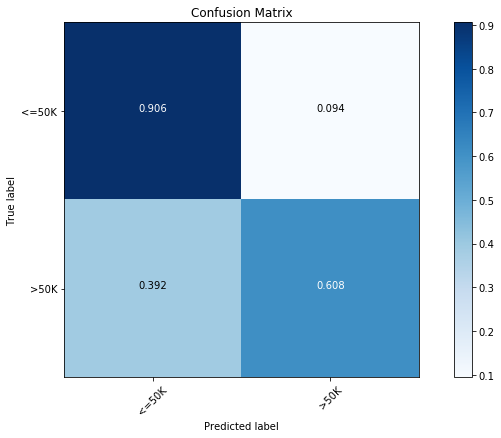

In [45]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
y_pred = treeClassifier.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["<=50K", ">50K"], normalize=True)

#### 2. K-Nearest Neighbour Algorithm

K-Nearest Neighbors (KNN) is another one of the simplest algorithms used in Data Mining which is used for regression and classification problems.  

In [46]:
from sklearn.neighbors import KNeighborsClassifier
s=KNeighborsClassifier()
s.fit(x_train,y_train)
s.score(x_test,y_test)

0.8470609913395983

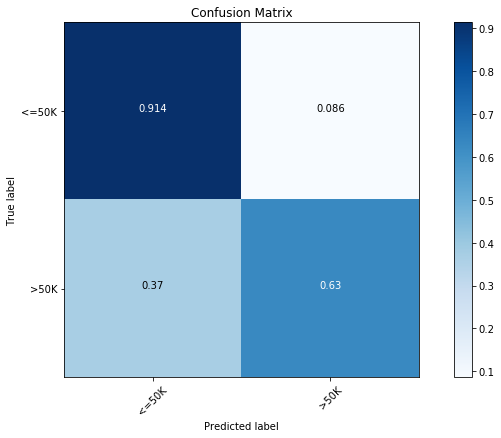

In [47]:
y_pred = s.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["<=50K", ">50K"], normalize=True)

#### 3. Random Forrest Algorithm

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [49]:
from sklearn.ensemble import RandomForestClassifier
l=RandomForestClassifier()
l.fit(x_train,y_train)
l.score(x_test,y_test)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8478594680916406

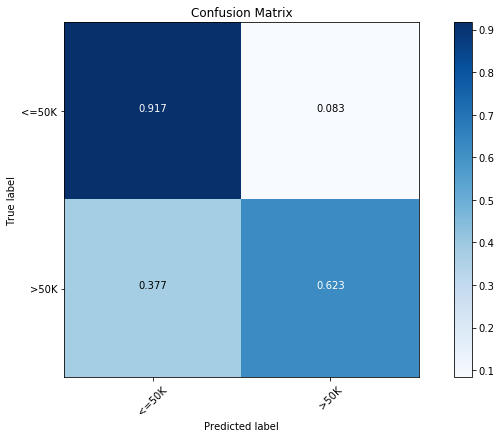

In [50]:
y_pred = l.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["<=50K", ">50K"], normalize=True)

#### 4. AdaBoost Algorithm

Boosting is a general ensemble method that creates a strong classifier from a number of weak classifiers. AdaBoost was the first really successful boosting algorithm developed for binary classification. AdaBoost is best used to boost the performance of decision trees on binary classification problems. The idea is to set weights to the classifier and data points in  a way that forces classifiers to concentrate on observations that are difficult to correctly classify. This process is odne sequentially in that two weights are adjusted at each step as the iterations in algorithm proceeds.

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

classifier = AdaBoostClassifier()
classifier.fit(x_train, y_train)
pred_classifier = classifier.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, pred_classifier))

Accuracy: 0.8575026104047663


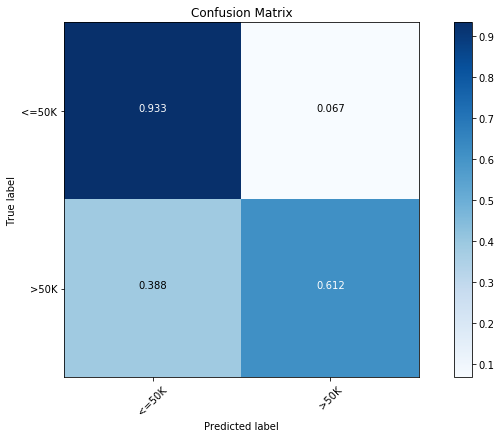

In [54]:
y_pred = classifier.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["<=50K", ">50K"], normalize=True)

#### 5. Gradient Boost Algorithm

Gradient boosting is one of the most powerful techniques for building predictive models.It produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

It relies on the intution that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
predicted_gbc = gbc.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predicted_gbc))

Accuracy: 0.8653645353479515


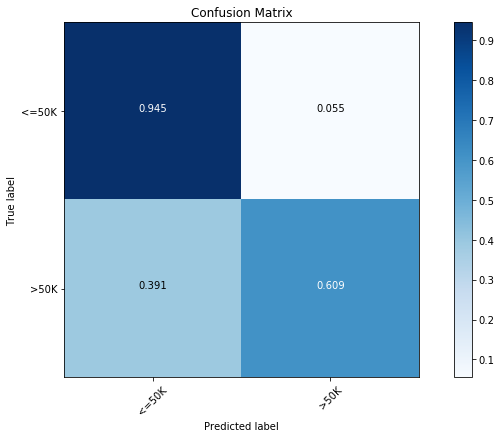

In [56]:
y_pred = gbc.predict(x_test)
cfm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(10,6))
plot_confusion_matrix(cfm, classes=["<=50K", ">50K"], normalize=True)

### 8. Conclusion

From the above evaluaions we can see that the best accuracy was acheived by using Gradient Boosting Algorithm at approximetely 86%. Hence for a much accurate prediction model we can use The gradient Boosting Algorithm for this data set    